In [1]:
!git clone https://github.com/PedroOrtix/ID_Inpainter.git
%cd ID_Inpainter
!pip install -r requirements.txt -q
!pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html -q

Cloning into 'ID_Inpainter'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 87 (delta 45), reused 63 (delta 24), pack-reused 0 (from 0)
Receiving objects: 100% (87/87), 1.63 MiB | 23.77 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/ID_Inpainter
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 91

In [1]:
%cd ID_Inpainter

/content/ID_Inpainter


In [2]:
from paddleocr import PaddleOCR
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

from utils import separar_cadenas, mostrar_diccionario_ascii

import ocr
from ocr import recalcular_cuadricula_rotada
from ocr import comparar_imagenes
from ocr import reemplazar_parte_imagen
from ocr import juntar_imagenes_vertical, rellenar_imagen_uniformemente
from ocr import recortar_imagen_uniformemente
from run import simple_inpaint

import matplotlib.pyplot as plt
from scipy import ndimage

Some weights of the model checkpoint at runwayml/stable-diffusion-v1-5 were not used when initializing AutoencoderKL: ['decoder.mid_block.attentions.0.proj_attn.weight', 'encoder.mid_block.attentions.0.query.weight', 'encoder.mid_block.attentions.0.value.weight', 'decoder.mid_block.attentions.0.query.weight', 'decoder.mid_block.attentions.0.query.bias', 'decoder.mid_block.attentions.0.value.bias', 'decoder.mid_block.attentions.0.key.bias', 'encoder.mid_block.attentions.0.key.weight', 'decoder.mid_block.attentions.0.key.weight', 'encoder.mid_block.attentions.0.proj_attn.bias', 'decoder.mid_block.attentions.0.value.weight', 'encoder.mid_block.attentions.0.key.bias', 'encoder.mid_block.attentions.0.proj_attn.weight', 'encoder.mid_block.attentions.0.value.bias', 'decoder.mid_block.attentions.0.proj_attn.bias', 'encoder.mid_block.attentions.0.query.bias']
- This IS expected if you are initializing AutoencoderKL from the checkpoint of a model trained on another task or with another architect

In [ ]:
#open a file containing the image
img = Image.open('images/imagen_dni.jpg')

# SOLO SI LA IMAGEN TIENE MUCHA RESOLUCIÓN
# Especificar el nuevo tamaño (por ejemplo, la mitad de la resolución original)
# nuevo_tamaño = (img.width // 2, img.height // 2)
# # Redimensionar la imagen
# img = img.resize(nuevo_tamaño, Image.ANTIALIAS)

img_array = np.array(img)

# Inicializar el modelo OCR Paddle
model = PaddleOCR(use_angle_cls=True, lang='es')  # 'es' para español
# Realiza OCR
result = model.ocr(img_array)
bounds = ocr.convert_paddle_to_easyocr(result)

# Imprime los nombres (textos) de los cuadros delimitadores
# tres nombres /n tres nombres
lista_elementos_detectados = []
for bound in bounds:
    lista_elementos_detectados.append(bound[1])

dict_elems = separar_cadenas(lista_elementos_detectados)
mostrar_diccionario_ascii(dict_elems)

In [65]:
palabra = "039936"
replace = "127648"
slider_step = 30
slider_guidance = 2
slider_batch = 6

[2024/08/24 10:36:01] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25,

100%|██████████| 30/30 [00:24<00:00,  1.20it/s]


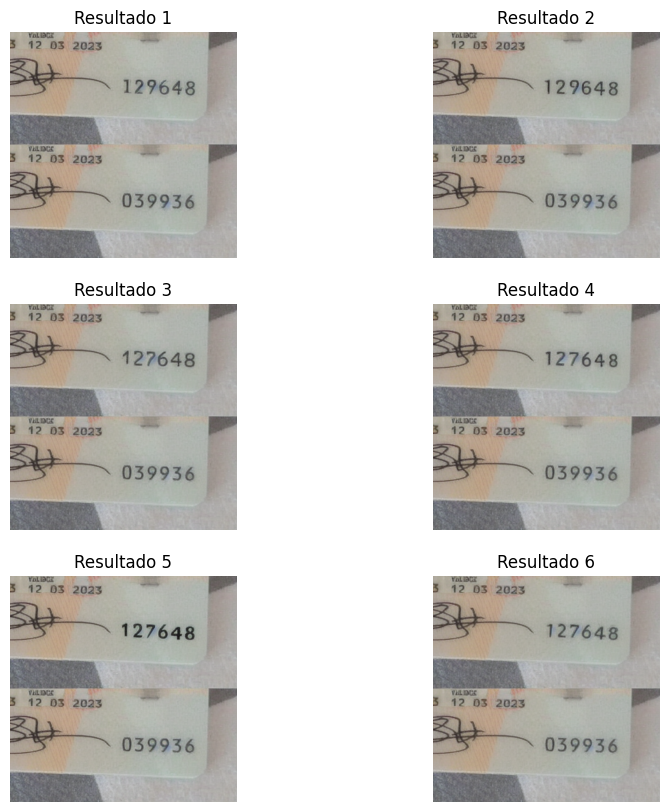

In [67]:
from run import process_image
modified_images, right_bounds, coordenadas_originales = process_image(palabra = palabra,
                replace = replace,
                bounds=bounds,
                img_array=img_array,
                height=256,
                weight=512,
                slider_step=30,
                slider_guidance=2,
                slider_batch=6,
                show_plot=True,
                save_intermediate_images=True)


In [68]:
# elegir cual te gusta mas
modified_images[5].save("images/modified_image.jpg")

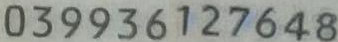

In [69]:
# ver la comparacion entre lo que se ha hecho inpaint
coodinates = np.array(right_bounds[0][0], dtype = int).flatten()
comparar_imagenes("images/imagen_dni_recortada.jpg",
                  "images/modified_image.jpg",
                  coodinates,
                  save_path="./",
                  adjust_temp=False)


In [70]:
img_pil = Image.open("images/imagen_dni_recortada.jpg")

In [71]:
# reemplazar la parte de la imagen original(512x512) por la modificada (boundong box modificada)
img_recortada_mod = reemplazar_parte_imagen(img_pil,
                                            modified_images[5],
                                            coodinates,
                                            adjust_temp=False)

In [72]:
img_recortada_mod.save("images/img_recortada_mod.jpg")

In [73]:
#return to the originar size before the padding
img_recortada_mod, _ = recortar_imagen_uniformemente(img_recortada_mod)
# take the half of the image horizontally of img_recortad_mod
img_recortada_mod = img_recortada_mod.crop((0, 0, img_recortada_mod.width, img_recortada_mod.height//2))
img_recortada_mod.save("images/img_recortada_mod.jpg")

In [74]:
# superponer la imagen 512x512 modificada a la original
img_array = img_array[:, :, :3]
x_min, y_min, x_max, y_max = coordenadas_originales
img_array[y_min:y_max, x_min:x_max] = np.array(img_recortada_mod)[:, :, :]

In [75]:
Image.fromarray(img_array).save("images/resultado_final.jpg")